In [12]:
%matplotlib inline
import theano
import keras
from __future__ import division,print_function
import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
import utils; reload(utils)
from utils import plots


In [64]:
from vgg16 import Vgg16
path = "data/dogscats/sample/"
test = "data/dogscats/test1/"
vgg = Vgg16()

In [69]:
batch_size = 4
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
test_batches = vgg.get_batches(test, batch_size=batch_size)

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [70]:
vgg.finetune(batches)
vgg.fit(batches,val_batches,nb_epoch=1)

Epoch 1/1
160/160 [==============================] - 53s - loss: 0.4325 - acc: 0.8813 - val_loss: 0.0093 - val_acc: 1.0000


## Use the validation data to test the accuracy

In [85]:
img,labels=next(batches)
labels

array([[ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.]], dtype=float32)

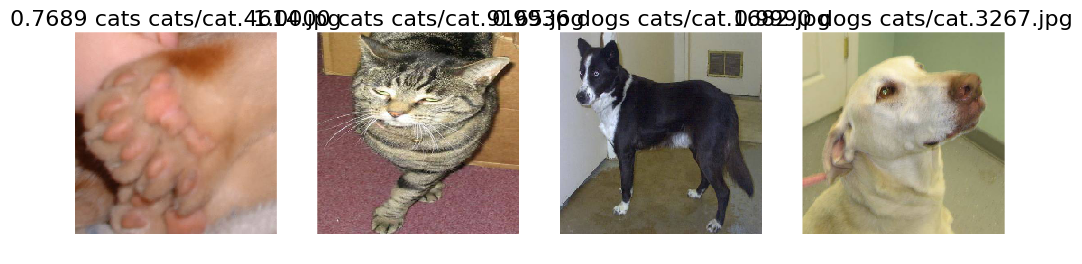

In [87]:

img,labels=next(batches)
res = vgg.predict(img,True)
labels = ['{:.4f}'.format(x) + " " + y + " " + f for x,y,f in zip(res[0],res[2],files)]
plots(img,titles=labels)

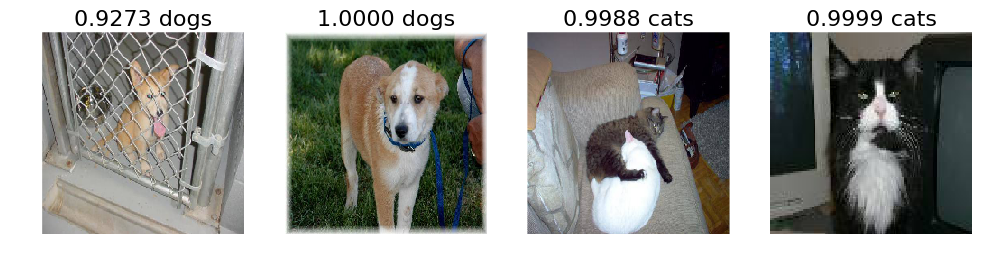

In [73]:
img,labels=next(test_batches)
res = vgg.predict(img,True)
labels = ['{:.4f}'.format(x) + " " + y for x,y in zip(res[0],res[2])]
plots(img,titles=labels)

In [ ]:
batches, preds = vgg.test(test,batch_size=batch_size)

    

In [ ]:
preds